<a href="https://colab.research.google.com/github/jianlgler/IST_labiagi/blob/main/PyTorch_AdaIN_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import torch
import torchvision.transforms as transforms
from torchvision.utils import save_image
import torchvision

from google.colab import drive
from PIL import Image
import os
import sys

import matplotlib.pyplot as plt

drive.mount("/content/data")

# Specify path path of the directory
path = "/content/data/MyDrive/images"
sys.path.append(path)

device = ("cuda" if torch.cuda.is_available() else "cpu")

Drive already mounted at /content/data; to attempt to forcibly remount, call drive.mount("/content/data", force_remount=True).


In [2]:
#eseguire una volta sola

!cp -r data/MyDrive/Utils Utils

In [3]:
from Utils import net

In [17]:
#Path check
path_check = os.path.join(path, "StyleTransfer Checkpoint Iter: 0.tar")

#path_check = os.path.join(path, "StyleTransfer Checkpoint Iter_ 120000.tar")
state_vgg = torch.load(os.path.join("/content/data/MyDrive/vgg_normalised.pth"), map_location=torch.device("cpu"))

style_dir = "style"
content_dir = "content"

network = net.Net(device, state_vgg, train=False, load_fromstate=True, load_path=path_check)

In [21]:
imsize = 512 # use small size if no gpu
# transform it into a torch tensor

transform = transforms.Compose([transforms.Resize(imsize),
                               #transforms.CenterCrop(256),
                               transforms.ToTensor()])

toPIL = transforms.ToPILImage(mode="RGB")

def imshow(tensor, title=None):
  image = tensor.cpu().clone()  # we clone the tensor to not do changes on it
  image = tensor.squeeze(0)      # remove the fake batch dimension
  #image = unloader(image)
  image = toPIL(image)
  plt.imshow(image)
  if title is not None:
      plt.title(title)
  plt.pause(0.001) # pause a bit so that plots are updated

In [22]:
# Path 
style_path, content_path = os.path.join(path, style_dir, "antimonocromatismo.jpg"), os.path.join(path, content_dir, "Tuebingen_Neckarfront.jpg")

# Load image, convert to RGB, transform, add 0 dimension and move to device
style = transform(Image.open(style_path).convert("RGB")).unsqueeze(0).to(device)
content = transform(Image.open(content_path).convert("RGB")).unsqueeze(0).to(device)

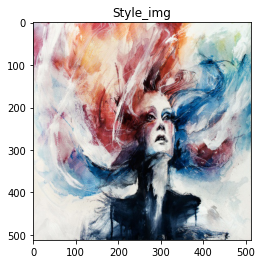

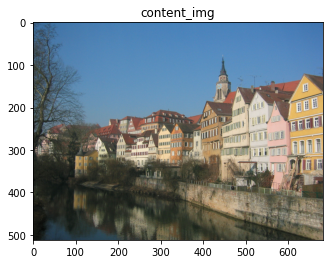

In [23]:
imshow(style, "Style_img")
imshow(content, "content_img")

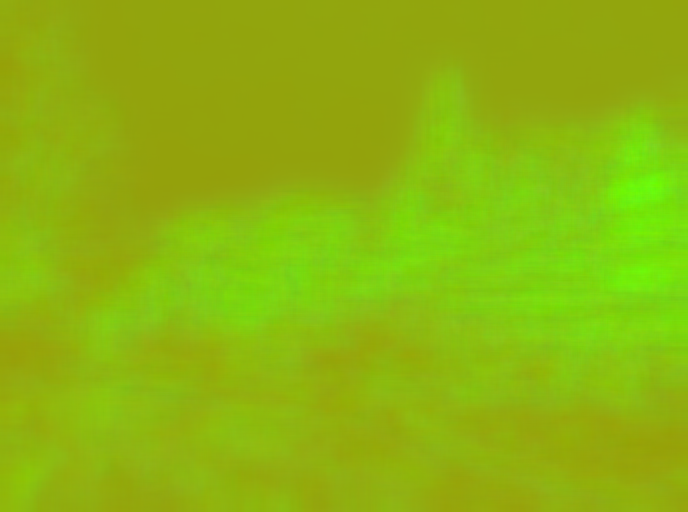

In [25]:
# generate image
alpha = 1.0
out = network(style, content, alpha).cpu()
# convert to grid/image
out = torchvision.utils.make_grid(out.clamp(min=-1, max=1), nrow=3, scale_each=True, normalize=True)
# Make Pil
img = toPIL(out)
img